In [16]:
import sys
[sys.path.append(i) for i in ['.', '..']]
import torch
import numpy as np
import sigpy as sp
from sigpy.mri.app import L1WaveletRecon
from prox import Prox
from linear.linearmaps import LinearMap
from linear.mri import FFTCn, Sense
import matplotlib.pyplot as plt

In [29]:
# FFT example
device0 = torch.device('cpu')
from skimage.data import shepp_logan_phantom
I_shepp = torch.tensor(shepp_logan_phantom()).to(device0)
Fop = FFTCn((400, 400), (400, 400), (0,1), norm = 'ortho')
k_shepp = Fop*I_shepp

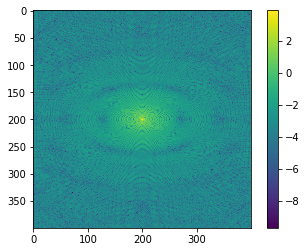

In [31]:
plt.imshow(torch.log(torch.abs(k_shepp)).data.numpy())
plt.colorbar()

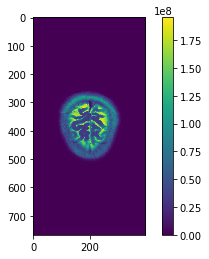

In [32]:
# MRI parallel imaging example
ex_multi = np.load('AXT2_210_6001736_layer11.npz')
device0 = torch.device('cpu')
k_c = torch.tensor(ex_multi['k_r'] + 1j*ex_multi['k_i']).to(device0)
s_c = torch.tensor(ex_multi['s_r'] + 1j*ex_multi['s_i']).to(device0)
(nc, nh, nw) = s_c.shape
Sop = Sense((nh, nw), (nc, nh, nw), (0,1), s_c, torch.ones(nh,nw), batchmode = False)
I0 = 2*Sop.H*k_c
plt.imshow(torch.abs(I0).data.numpy())
plt.colorbar()

In [37]:
tuple(k_c.shape)

(16, 768, 396)